# The Sparks Foundation

## Name: Swamini Sontakke

### Task1:Predict the percentage of an student based on the no. of study hours.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics

In [2]:
#readind data from file
df = pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
# checking for null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

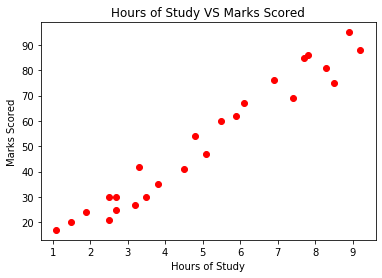

In [5]:
#plotting the data to get an idea of the relation between the two parameters
plt.scatter(df['Hours'],df['Scores'],c='red')
plt.title('Hours of Study VS Marks Scored')
plt.xlabel('Hours of Study')
plt.ylabel('Marks Scored')
plt.show()

#### From the above plot it seems that marks scored and hours of study are correlated.

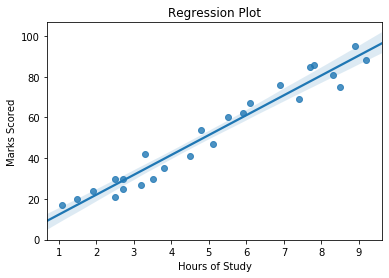

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [6]:
#ploting regression plot to check correlation
sns.regplot(df['Hours'],df['Scores'])
plt.title('Regression Plot')
plt.xlabel('Hours of Study')
plt.ylabel('Marks Scored')
plt.show()
print(df.corr())

#### From above plot we confirm that 'Hours' and 'Scores' are positively correlated

## Model Training 

In [7]:
#splitting the data into training and testing data
X = df['Hours'].values.reshape(-1,1)
Y = df['Scores'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

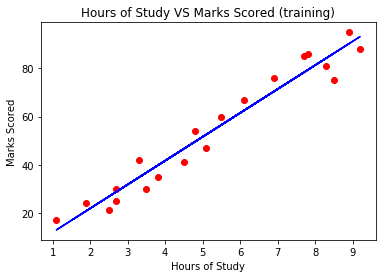

In [9]:
#plotting for training data along with regression line
line = lin_reg.coef_* X + lin_reg.intercept_
plt.scatter(x_train, y_train, c='r')
plt.plot(X, line, c='b')
plt.title('Hours of Study VS Marks Scored (training)')
plt.xlabel('Hours of Study')
plt.ylabel('Marks Scored')
plt.show()

## Predicting values

In [10]:
y_pred = lin_reg.predict(x_test)
print(y_pred)

[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


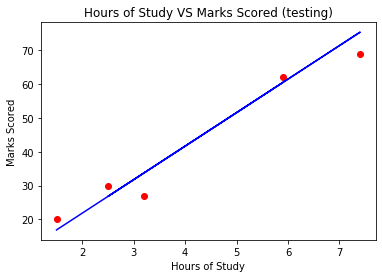

In [11]:
# Ploting testing data 
plt.scatter(x_test, y_test, c='r')
plt.plot(x_test, y_pred, c = 'b')
plt.title('Hours of Study VS Marks Scored (testing)')
plt.xlabel('Hours of Study')
plt.ylabel('Marks Scored')
plt.show()

### Comparing the predicted values of score and the actual values  of score

In [12]:
predict = pd.DataFrame({"Hours": x_test.reshape(1,-1)[0] , "Actual Score" : y_test.reshape(1,-1)[0] , "Predicted Score" : y_pred.reshape(1,-1)[0]})
print(predict)

   Hours  Actual Score  Predicted Score
0    1.5            20        16.884145
1    3.2            27        33.732261
2    7.4            69        75.357018
3    2.5            30        26.794801
4    5.9            62        60.491033


### Visually comparing actual and predicted values

In [13]:
#firstly sorting the actual values with ascending order 
df_sorted = predict.sort_values(by = "Hours")
print(df_sorted)

   Hours  Actual Score  Predicted Score
0    1.5            20        16.884145
3    2.5            30        26.794801
1    3.2            27        33.732261
4    5.9            62        60.491033
2    7.4            69        75.357018


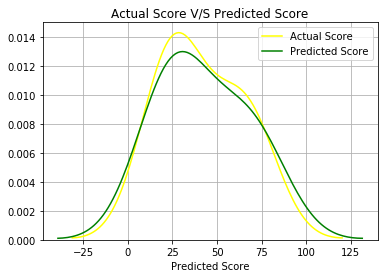

In [14]:
ax1 = sns.distplot(df_sorted["Actual Score"], hist = False , color = "yellow" , label = "Actual Score")
sns.distplot(df_sorted["Predicted Score"] , hist = False , color = "green" , label = "Predicted Score" , ax = ax1)
plt.legend()
plt.grid()
plt.title('Actual Score V/S Predicted Score')
plt.show()

## Evaluating the model

In [15]:
mean_absolute_error=metrics.mean_absolute_error(y_test,y_pred)
print('Mean absolute error:',mean_absolute_error)
corr=r2_score(y_train,lin_reg.predict(x_train))
print('correlation:',corr)
acc=r2_score(y_test,y_pred)
print('Accuracy:',acc)

Mean absolute error: 4.183859899002975
correlation: 0.9515510725211552
Accuracy: 0.9454906892105356


## Predicting Score

In [19]:
#Checking the score for hours of study
hrs = 8.5
pred = lin_reg.predict([[hrs]])
print("The predicted score if a student studies for", hrs,"hrs/day is" ,pred[0])

The predicted score if a student studies for 8.5 hrs/day is [86.25874013]


### The predicted score if a student studies for 8.5 hrs/day is 86.25874013